# Data Set - Chest X-ray image

Download from kaggle -> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

# Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# Chest x-ray:
     An x-ray exam will allow your doctor to see your lungs,
    heart and blood vessels to help determine if you have pneumonia.
    When interpreting the x-ray, 
    the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.image import imread

In [2]:
import os

os.listdir('../input/chest-xray-pneumonia/chest_xray/train/')

['NORMAL', 'PNEUMONIA']

In [3]:
train = '../input/chest-xray-pneumonia/chest_xray/train/'
test = '../input/chest-xray-pneumonia/chest_xray/test/'
val = '../input/chest-xray-pneumonia/chest_xray/val/'

# Image

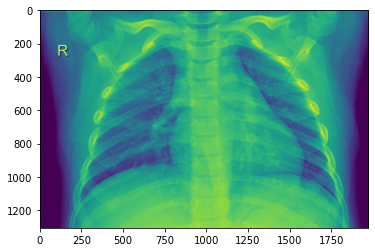

In [4]:
normal_1 = imread('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg')

plt.imshow(normal_1)
plt.show()

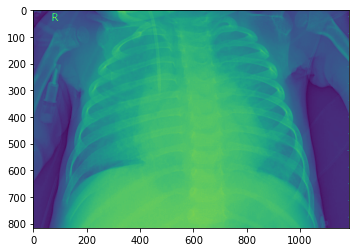

In [5]:
pneumonia_1 = imread('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg')

plt.imshow(pneumonia_1)
plt.show()

# Data Augmentation

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              rescale=1/255)

In [8]:
train_image_gen = image_gen.flow_from_directory(train,
                                               target_size=IMAGE_SIZE,
                                               batch_size=32,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
val_image_gen = image_gen.flow_from_directory(val,
                                               target_size=IMAGE_SIZE,
                                               batch_size=32,
                                               class_mode='binary',shuffle=False)

test_image_gen = image_gen.flow_from_directory(test,
                                               target_size=IMAGE_SIZE,
                                               batch_size=32,
                                               class_mode='binary',shuffle=False)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Training Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=IMAGE_SIZE + [3], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=IMAGE_SIZE + [3], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=IMAGE_SIZE + [3], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_Stop = EarlyStopping(patience=2)

In [13]:
r = model.fit_generator(
  train_image_gen,
  validation_data=val_image_gen,
  epochs=30,
  steps_per_epoch=len(train_image_gen),
  validation_steps=len(val_image_gen),
  callbacks=[early_Stop]
)

Epoch 1/30
163/163 [==============================] - 139s 850ms/step - loss: 0.4381 - accuracy: 0.7993 - val_loss: 1.9088 - val_accuracy: 0.6875
Epoch 2/30
163/163 [==============================] - 124s 763ms/step - loss: 0.2827 - accuracy: 0.8796 - val_loss: 1.8429 - val_accuracy: 0.5625
Epoch 3/30
163/163 [==============================] - 128s 783ms/step - loss: 0.2657 - accuracy: 0.8848 - val_loss: 1.4149 - val_accuracy: 0.6250
Epoch 4/30
163/163 [==============================] - 126s 776ms/step - loss: 0.2502 - accuracy: 0.8947 - val_loss: 1.4382 - val_accuracy: 0.6250
Epoch 5/30
163/163 [==============================] - 123s 757ms/step - loss: 0.2217 - accuracy: 0.9151 - val_loss: 0.8715 - val_accuracy: 0.7500
Epoch 6/30
163/163 [==============================] - 122s 749ms/step - loss: 0.1959 - accuracy: 0.9220 - val_loss: 1.5973 - val_accuracy: 0.6250
Epoch 7/30
163/163 [==============================] - 124s 761ms/step - loss: 0.2065 - accuracy: 0.9174 - val_loss: 1.1764 -

In [14]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.438113,0.799271,1.908835,0.6875
1,0.282658,0.879601,1.842877,0.5625
2,0.265746,0.884778,1.414890,0.6250
3,0.250233,0.894747,1.438198,0.6250
4,0.221703,0.915069,0.871489,0.7500
5,0.195854,0.921971,1.597255,0.6250
6,0.206540,0.917370,1.176402,0.6875


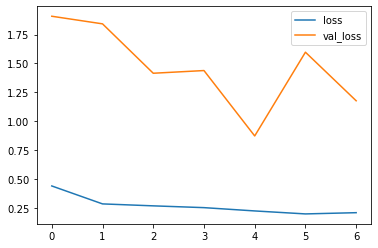

In [16]:
metrics[['loss','val_loss']].plot()
plt.show()

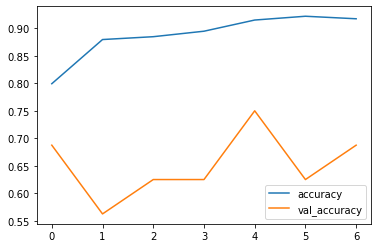

In [17]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [18]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [19]:
model.evaluate_generator(val_image_gen)

[1.0229231119155884, 0.625]

# Prediction on Test Data 

In [21]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)

In [23]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
predictions = pred_probabilities > 0.5

In [28]:
predictions[0] # it will give boolean values

array([ True])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       234
           1       0.80      0.96      0.88       390

    accuracy                           0.83       624
   macro avg       0.85      0.79      0.80       624
weighted avg       0.84      0.83      0.82       624



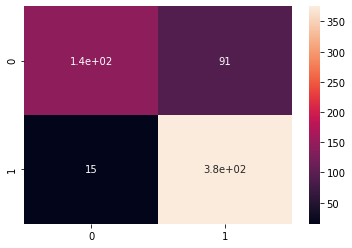

In [34]:
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

print(f'Accuracy -> ',accuracy_score(test_image_gen.classes,predictions)*100)

Accuracy ->  83.01282051282051


# Checking model

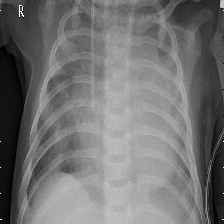

In [37]:
img = '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'

my_image = image.load_img(img,target_size=IMAGE_SIZE)

my_image

In [38]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [39]:
my_image.shape

(224, 224, 3)

In [40]:
my_image = np.expand_dims(my_image, axis=0)

In [41]:
my_image.shape

(1, 224, 224, 3)

In [42]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [43]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [2]:
# We Get Correct anwser

# Well Done we get 83% Accuracy  !! 